# Проект по анализу данных 

Рейтинг университетов.

Для анализа рейтингов университетов по всему миру используются данные с сайта kaggle.com (ссылка: https://www.kaggle.com/mylesoneill/world-university-rankings)

__ Цели и задачи проекта: __

1. Определение места университета в мировых рейтингах в соответствии с имеющимися данными, что позволит университетам выделить наиболее приоритеные направления развития для увеличения своей популярности и мирового признания.

2. Определение влияния показателей расходов на образование и уровня образованности на средний total_score по странам, что позвоит показать на сколько важным являются инвестиции в образование для его развития и мирового признания

Прмимо поставленных задач, также планируется провести анализ положения российских университетов в международных рейтингах 

__Описание набора данных__
Данные представляют собой три независимых рейтинга университетов мира и две базы данных
    Рейтинг Times Higher Education World University Ranking 
    Рейтинг Academic Ranking of World Universities
    Рейтинг Center for World University Rankings
    Данные по качеству образования
    Данные по государственым и частным затратам на образование 

In [2]:
import pandas as pd
import scipy.stats 
import numpy as np
import matplotlib.pyplot as plt
import operator
import seaborn as sns
from sklearn.preprocessing import normalize
from scipy.stats.stats import pearsonr
%matplotlib inline
df1 = pd.read_csv('timesData.csv')
df2 = pd.read_csv('shanghaiData.csv')
school_country = pd.read_csv('school_and_country_table.csv')
df3 = pd.read_csv('cwurData.csv')
attain_sup = pd.read_csv('educational_attainment_supplementary_data.csv')
expend_sup = pd.read_csv('education_expenditure_supplementary_data.csv', engine='python')

Изучим переменные, представленные в каждом рейтинге:

In [21]:
df = [df1, df2, df3] # список из баз данных по рейтингам университетов
names_rank = ['Times Higher Education World University Ranking', 'Academic Ranking of World Universities', 'Center for World University Rankings']
# names_rank список официальных наименований рейтингов
for i in range(len(df)):
    col = (df[i]).columns
    print(names_rank[i])
    print(col)
    print('\n')

Times Higher Education World University Ranking
Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')


Academic Ranking of World Universities
Index(['world_rank', 'university_name', 'national_rank', 'total_score',
       'alumni', 'award', 'hici', 'ns', 'pub', 'pcp', 'year', 'country'],
      dtype='object')


Center for World University Rankings
Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')




__Список перемнных:__
1. Times Higher Education World University Ranking:
    * world_rank - мировой рейтинг для университета
    * university_name - название унивеситета
    * country - страна, в которой находится университет
    * teaching - баллы университета за обучение
    * international - баллы университета за международное сотрудничество(преподаватели, студенты, исследования)
    * research - баллы университета за исследования
    * citations - баллы университета за цитирование
    * income - баллы университета за вклад в образование(перемещение знаний)
    * total_score - итоговый балл
    * num_students - количество обучаемых студентов
    * student_staff_ratio - соотношение числа студентов и преподавателей
    * international_students - процент иностранных студентов
    * female_male_ratio - соотношение женщин и мужчин среди студентов
    * year - год, в котором составлялся рейтинг
2. Academic Ranking of World Universities:
    * world_rank - мировой рейтинг для университета
    * university_name - название унивеситета
    * national_rank - рейтинг университета в пределах своей страны
    * total_score - итоговый балл
    * alumni - баллы университета за успешних выпускников(лауреаты Нобелевской премии или других наград)
    * award - баллы университета за успешних преподавателей(лауреаты Нобелевской премии)
    * hici - баллы университета за высоко оцененных исследователей
    * ns - баллы университета за публикации в Nature and Science
    * pub - баллы университета за общее количество публикаций
    * pcp - взвешенные баллы университета за преподавателей на полной ставке
    * year - год, в котором составлялся рейтинг
3. Academic Ranking of World Universities:
    * world_rank - мировой рейтинг для университета
    * institution - название унивеситета
    * country - страна, в которой находится университет
    * national_rank - рейтинг университета в пределах своей страны
    * quality_of_education - рейтинг качеству образования
    * alumni_employment - рейтинг по трудоустройству выпускников
    * quality_of_faculty - рейтинг по качеству преподавательского состава
    * publications - рейтинг университета по публикациям
    * influence - рейтинг университета по влиянию
    * citations - рейтинг университета по цитированию
    * broad_impact - рейтинг университета по общему влиянию
    * patents - рейтинг университета по патентам
    * score - итоговый балл
    * year - год, в котором составлялся рейтинг

Помимо трех мировых рейтингов среди данных присутсвуют три базы данных:
1. School and Country
    * school name - название унивеситета
    * country - страна, в которой находится университет
2. Educational attainment 
    * country_name - страна
    * series_name - среднее количество лет обучения; уровень образования в зависимости от половозрастной группы; плотность населения(Barro-Lee Dataset (2014)); среднее количесто лет обучения, доля населения в возрасте 25+ распределнных в зависимости от уровня образования (UNESCO Institute for Statistics; 152 страны; 1985-2015)
    * 1985, 2015 - год
    * Barro-Lee Dataset (2014) 
    * UNESCO Institute for Statistics (UIS)
3. Education expenditure
    * country - страна
    * institute_type - тип образовательного учреждения(начальная, средняя школа, высшие учебные заведения)
    * direct_expenditure_type - тип затрат на образование(государственные, частные или общие)
    * 1995, 2011 - год

Посмотрим на общие характеристики набора данных

In [5]:
print('Times Higher Education World University Ranking')
shape = df1.shape
print('Размерность составленного рейтинга:','количество наблюдений', shape[0], ';', 'количество переменных', shape[1])
df1.describe().T   

Times Higher Education World University Ranking
Размерность составленного рейтинга: количество наблюдений 2603 ; количество переменных 14


,count,mean,std,min,25%,50%,75%,max
teaching,2603,37.801498,17.604218,9.9,24.700,33.9,46.40,99.7
research,2603,35.910257,21.254805,2.9,19.600,30.5,47.25,99.4
citations,2603,60.921629,23.073219,1.2,45.500,62.5,79.05,100.0
student_staff_ratio,2544,18.445283,11.458698,0.6,11.975,16.1,21.50,162.6
year,2603,2014.075682,1.685733,2011.0,2013.000,2014.0,2016.00,2016.0


In [6]:
print('Academic Ranking of World Universities')
shape = df2.shape
print('Размерность составленного рейтинга:','количество наблюдений', shape[0], ';', 'количество переменных', shape[1])
df2.describe().T   

Academic Ranking of World Universities
Размерность составленного рейтинга: количество наблюдений 4897 ; количество переменных 11


,count,mean,std,min,25%,50%,75%,max
total_score,1101,36.383470,13.557186,23.5,27.4,31.3,41.8,100
alumni,4896,9.161724,14.140636,0.0,0.0,0.0,15.6,100
award,4895,7.691910,15.494110,0.0,0.0,0.0,13.4,100
hici,4895,16.221491,14.382710,0.0,7.3,12.6,21.7,100
ns,4875,16.078503,12.511529,0.0,8.0,12.8,19.8,100
pub,4895,38.254648,13.050809,7.3,28.9,36.0,45.3,100
pcp,4895,21.242329,9.254351,8.3,15.6,19.0,24.5,100
year,4897,2009.658566,3.197576,2005.0,2007.0,2009.0,2012.0,2015


In [7]:
print('Center for World University Rankings')
shape = df3.shape
print('Размерность составленного рейтинга:','количество наблюдений', shape[0], ';', 'количество переменных', shape[1])
df3.describe().T   

Center for World University Rankings
Размерность составленного рейтинга: количество наблюдений 2200 ; количество переменных 14


,count,mean,std,min,25%,50%,75%,max
world_rank,2200,459.590909,304.320363,1.00,175.75,450.5,725.250,1000
national_rank,2200,40.278182,51.740870,1.00,6.00,21.0,49.000,229
quality_of_education,2200,275.100455,121.935100,1.00,175.75,355.0,367.000,367
alumni_employment,2200,357.116818,186.779252,1.00,175.75,450.5,478.000,567
quality_of_faculty,2200,178.888182,64.050885,1.00,175.75,210.0,218.000,218
publications,2200,459.908636,303.760352,1.00,175.75,450.5,725.000,1000
influence,2200,459.797727,303.331822,1.00,175.75,450.5,725.250,991
citations,2200,413.417273,264.366549,1.00,161.00,406.0,645.000,812
broad_impact,2000,496.699500,286.919755,1.00,250.50,496.0,741.000,1000
patents,2200,433.346364,273.996525,1.00,170.75,426.0,714.250,871


In [8]:
print('School and Country')
shape = school_country.shape
print('Размерность составленного рейтинга:','количество наблюдений', shape[0], ';', 'количество переменных', shape[1])
school_country.describe().T   

School and Country
Размерность составленного рейтинга: количество наблюдений 818 ; количество переменных 2


,count,unique,top,freq
school_name,818,818,University of Marrakech Cadi Ayyad,1
country,818,70,United States of America,161


In [9]:
# Educational attainment охватывает промежуток с 1985-2015, так как рейтинги охватывают промежуток с 2005 по 2016
# выведем данные за период с 2005-2015
print('Educational attainment')
attain_sup_2005_2015 = attain_sup.iloc[:,[0,1,19,20,21,22,23,24,25,26,27,28]]
shape_0 = attain_sup.shape
shape = attain_sup_2005_2015.shape
print('Размерность составленного рейтинга:','количество наблюдений', shape_0[0], ';', 'количество переменных', shape_0[1])
print('Размерность составленного рейтинга 2005-2015:','количество наблюдений', shape[0], ';', 'количество переменных', shape[1])
attain_sup_2005_2015.describe().T   

Educational attainment
Размерность составленного рейтинга: количество наблюдений 79055 ; количество переменных 29
Размерность составленного рейтинга 2005-2015: количество наблюдений 79055 ; количество переменных 12


,count,mean,std,min,25%,50%,75%,max
2005,52037,363.519873,8563.497493,0.00000,1.930000,7.250000,26.410000,1034076.00000
2006,204,13.172861,14.756343,0.12933,5.855385,8.623460,15.203413,93.68704
2007,286,16.073780,22.696642,0.00000,3.057243,9.234600,16.020193,99.99305
2008,366,14.849021,17.947568,0.00000,5.408055,9.460645,14.590020,97.70276
2009,464,17.527544,22.434285,0.00000,4.462345,10.165165,17.457817,98.72121
2010,52796,386.641842,9146.338286,0.00000,2.010000,7.470000,27.000000,1090693.00000
2011,929,20.351652,25.186301,0.00000,2.743710,10.797220,25.529380,99.52137
2012,1106,19.483375,24.036373,0.00000,1.498103,10.602820,26.929520,98.67698
2013,1879,23.113742,28.481772,0.00000,1.050885,11.875010,31.535075,100.00000
2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print('Education expenditure')
shape = expend_sup.shape
print('Размерность составленного рейтинга:','количество наблюдений', shape[0], ';', 'количество переменных', shape[1])
expend_sup.describe().T   

Education expenditure
Размерность составленного рейтинга: количество наблюдений 333 ; количество переменных 9


,count,mean,std,min,25%,50%,75%,max
1995,94,3.106383,1.790465,0.1,1.10,3.40,4.50,6.8
2000,99,3.062626,1.725475,0.5,1.20,3.30,4.35,6.6
2005,106,3.142453,1.752329,0.3,1.20,3.45,4.30,7.2
2009,103,3.388350,1.869534,0.3,1.35,3.70,4.85,7.5
2010,101,3.392079,1.883119,0.5,1.30,3.60,4.80,7.6
2011,282,2.573050,2.130673,0.0,0.70,1.75,4.30,7.9


Помимо этого, можно посмотреть попарную визуализацию всех признаков любой из представленных баз данных.
Так как использование данного пакета предполагает отсутствие пропущенных значений в базе данных, удалим все пропущенные значения из первого рейтинга (Times) и визуализируем их, аналогично использование этого метода и на других данных

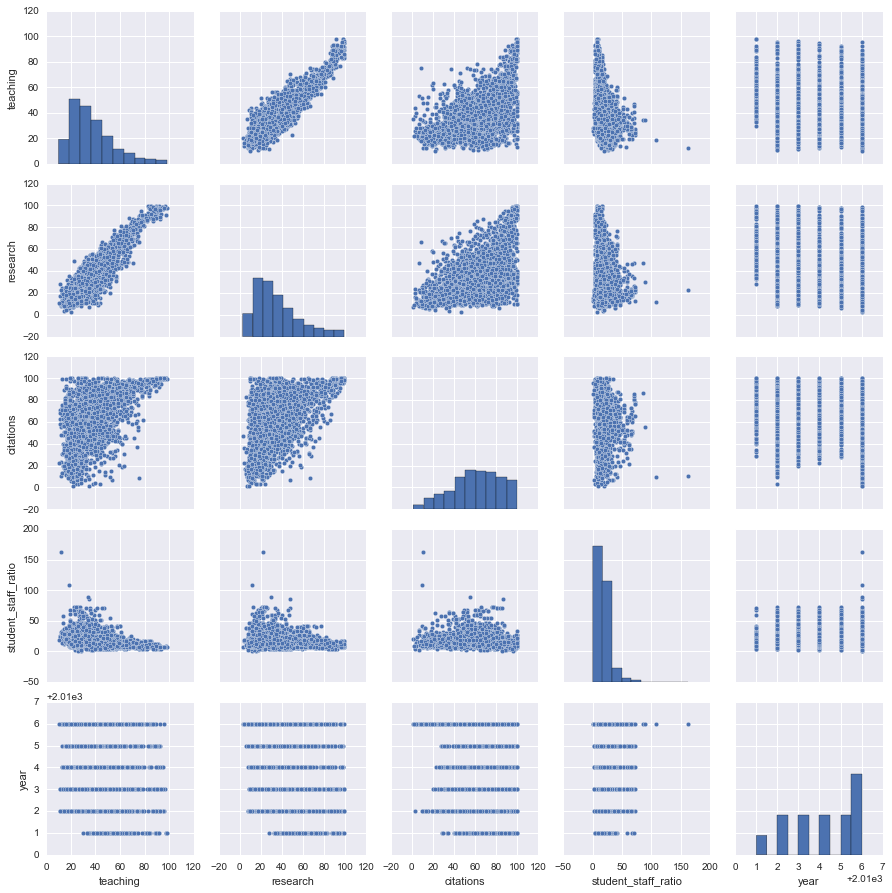

In [5]:
df1_m = df1.dropna(how='any')
sns.pairplot(df1_m)

Так как данные охватывают периоды не в один год, посмотрим, какие периоды представлены в рейтингах и сколько наблюдений (университетов) было включено в рейтинг в каждый год 

In [11]:
for i in range(len(df)):
    a = (df[i])['year'].value_counts()
    print(names_rank[i])
    print(a)
    print('\n')

Times Higher Education World University Ranking
2016    800
2012    402
2015    401
2013    400
2014    400
2011    200
Name: year, dtype: int64


Academic Ranking of World Universities
2007    510
2008    503
2009    501
2015    500
2011    500
2014    500
2010    500
2006    500
2005    500
2012    284
2013     99
Name: year, dtype: int64


Center for World University Rankings
2015    1000
2014    1000
2013     100
2012     100
Name: year, dtype: int64




В результате, мы получили, что рейтинги возможно сравнить друг с другом в период с 2012-2015 года, поэтому будем использовать этот временной промежуток при сравнении рейтингов.

In [6]:
years = [2012, 2013, 2014, 2015] 

Построим распределение **total score** для всех рейтингов в одни и те же периоды:

In [7]:
df1 = df1[df1.total_score != '-']

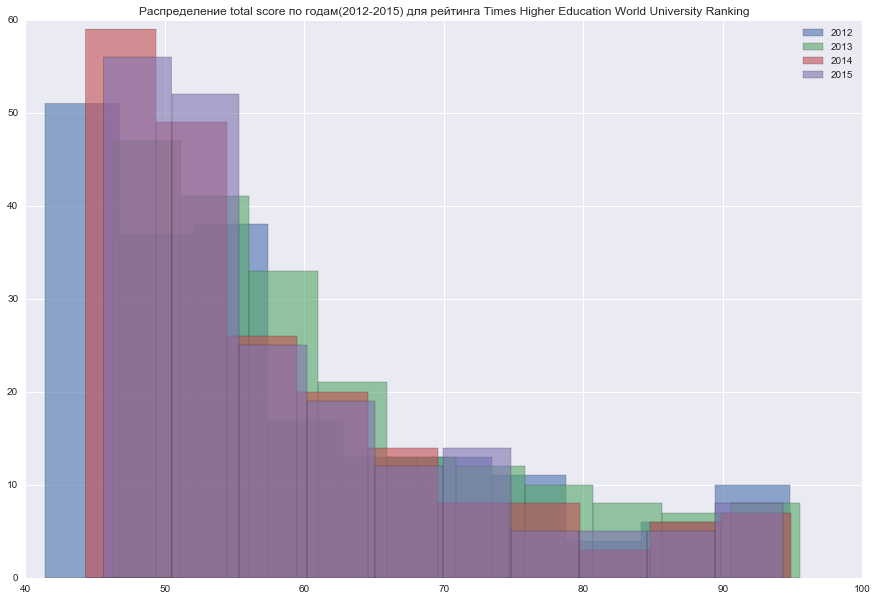

In [8]:
for i in years:
    df1[df1['year'] == i]['total_score'].astype(float).hist(figsize = (15,10), label = '%s' % i, alpha = 0.6)
plt.legend(loc='upper right')
plt.title('Распределение total score по годам(2012-2015) для рейтинга Times Higher Education World University Ranking')
plt.show()

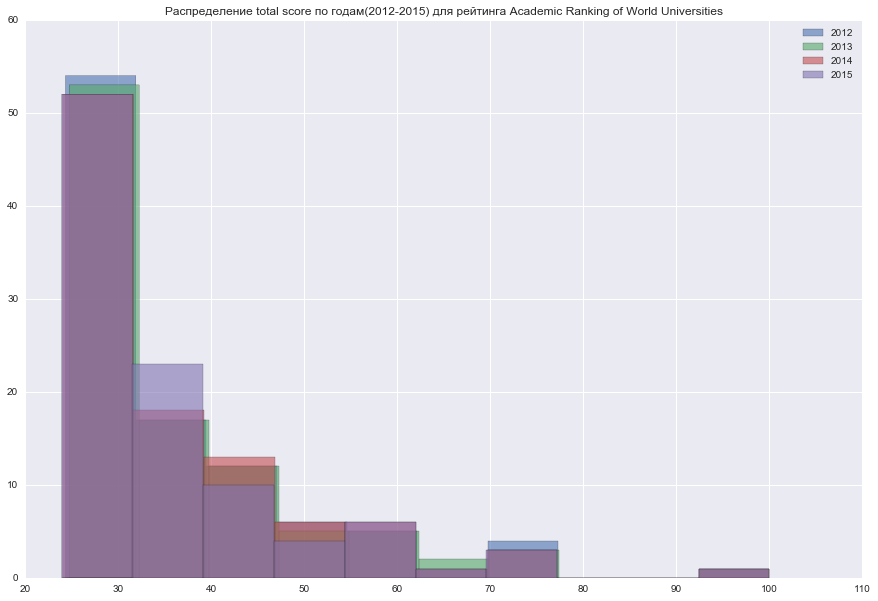

In [9]:
for i in years:
    df2[df2['year'] == i]['total_score'].astype(float).hist(figsize = (15,10), label = '%s' % i, alpha = 0.6)
plt.legend(loc='upper right')
plt.title('Распределение total score по годам(2012-2015) для рейтинга Academic Ranking of World Universities')
plt.show()

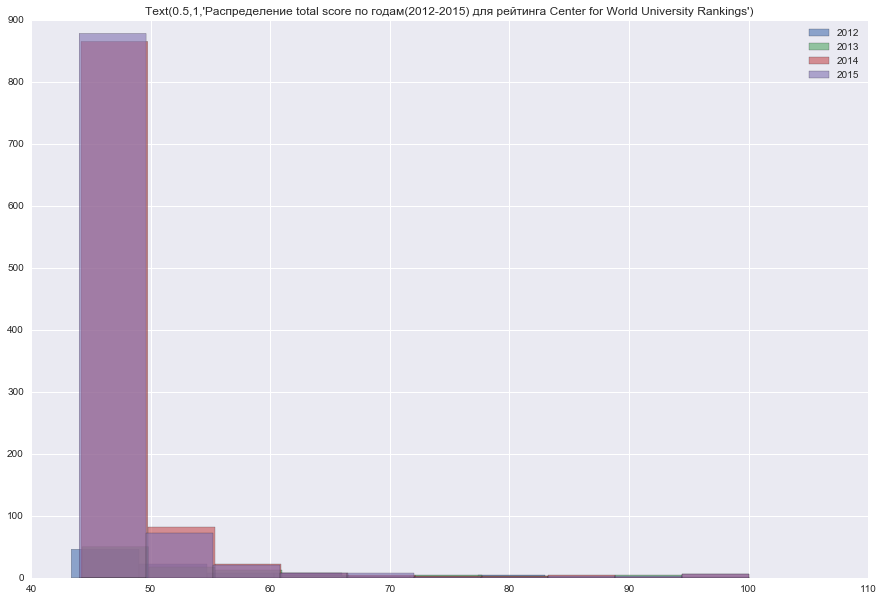

In [10]:
for i in years:
    df3[df3['year'] == i]['score'].astype(float).hist(figsize = (15,10), label = '%s' % i, alpha = 0.6)
plt.legend(loc='upper right')
plt.title(plt.title('Распределение total score по годам(2012-2015) для рейтинга Center for World University Rankings'))
plt.show()

In [11]:
df2['country'] = ['0']*len(df2)

Во втором рейтиге отсутствует переменная country. С помощью таблицы school and country постараемся восстановить страну для каждого университета. В тех ячейках, для которых не получилось восстановить данные, поставим "0"

In [12]:
for i in range(len(df2)):
    if not school_country[school_country['school_name'] == df2.loc[i]['university_name']].empty:
        df2.set_value(i, 'country', school_country[school_country['school_name'] == df2.loc[i]['university_name']]['country'].values[0])
df2.head(5)

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year,country
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005,United States of America
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005,United Kingdom
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005,United States of America
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005,United States of America
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005,0


Удалим из таблцы строки, в которых country имеет значение "0", затем построим распределение университетов из 2 рейтинга по странам:

In [13]:
df2fixed = df2[df2['country'] != '0'] 

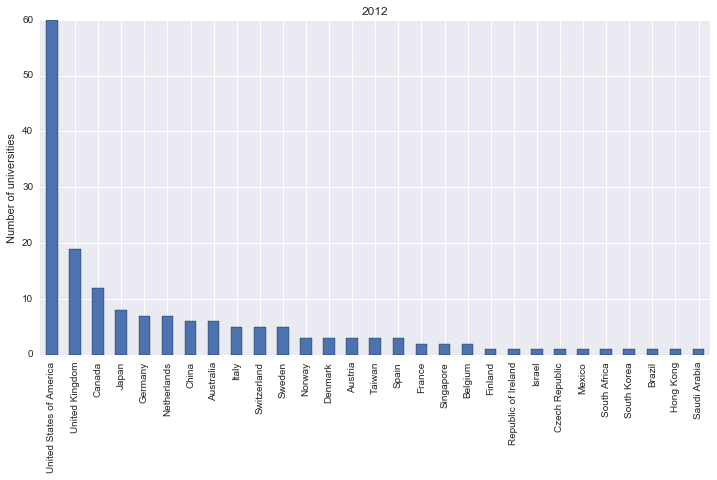

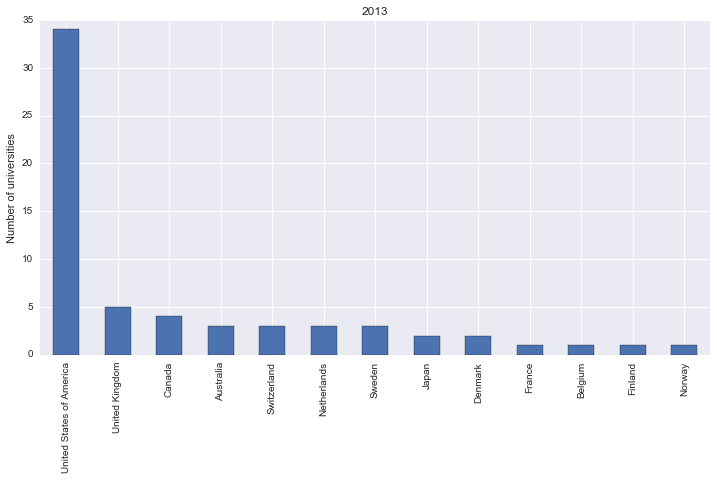

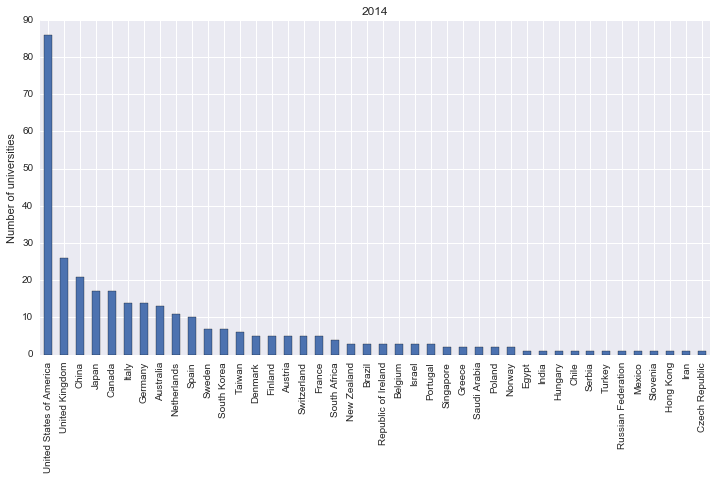

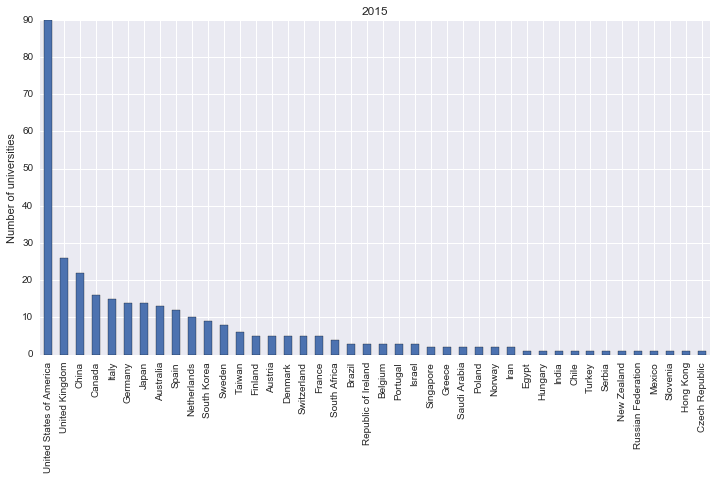

In [14]:
for i in years:
    plt.figure(figsize=(12,6))
    df2fixed[df2fixed['year'] == i]['country'].value_counts().plot.bar()
    plt.ylabel('Number of universities')
    plt.title(i)
    plt.show()

Аналогично можно построить распределения по странам и для двух других оставшихся рейтингов, помимо этого можно посмотреть университеты каких стран входят в 100 лучших по всем рейтингам за период с 2012 по 2015 года

In [34]:
df_fix = [df1, df2fixed, df3]
for i in range(len(df_fix)):
    print(names_rank[i])
    for j in range(len(years)):
        s = df_fix[i][df_fix[i]['year']==years[j]]['country'].iloc[0:101].value_counts()
        print(years[j])
        print(s)
        print('\n')

Times Higher Education World University Ranking
2012
United States of America    51
United Kingdom              13
Canada                       5
Australia                    4
Germany                      4
Netherlands                  4
Switzerland                  3
France                       3
Sweden                       3
Japan                        2
Hong Kong                    2
South Korea                  2
China                        2
Singapore                    1
Belgium                      1
Finland                      1
Name: country, dtype: int64


2013
United States of America    47
United Kingdom              10
Netherlands                  7
Australia                    6
Canada                       5
Germany                      4
France                       4
Switzerland                  3
South Korea                  3
Japan                        2
Hong Kong                    2
Singapore                    2
Belgium                      2
China        

Посмотрим теперь на некоторые признаки, представленные в данных по расходам на образование (за периоды:1995,2000,2005,2009-2011). Выведем график стран по расходам на все образовательные институты в % от ВВП в 2011 году.

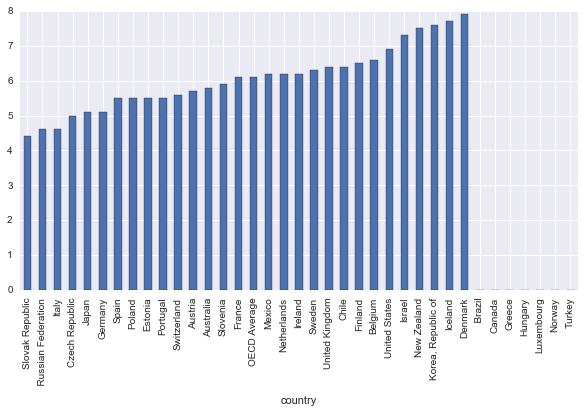

In [35]:
exp2 = expend_sup[expend_sup['institute_type'] == 'All Institutions ']
exp2[exp2['direct_expenditure_type'] == 'Total'].groupby('country')['2011'].mean().sort_values().plot.bar(figsize=(10,5))

проанализируем данные по уровню образования в странах за периоды с 2005 по 2015

In [43]:
attain_sup_2005_2015 = attain_sup.iloc[:,[0,1,19,20,21,22,23,24,25,26,27,28]]


Из предложенных индексов только UNESCO Institute for Statistics содержит данные за интересующий нас период с 2012-2015 года. 
Мы выбрали показатели, которые с нашей точки зрения наибольшим образом отражают развитие образования в странвх и визуализировали данные за 2012 год.


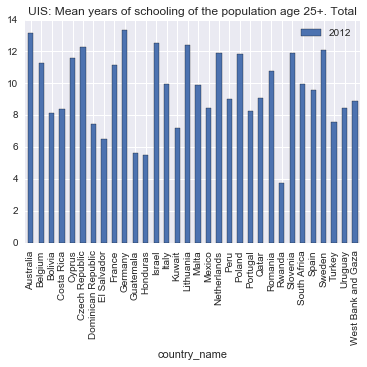

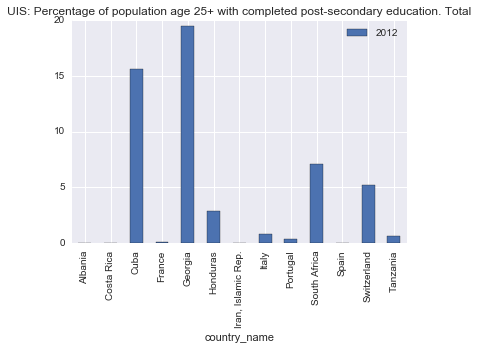

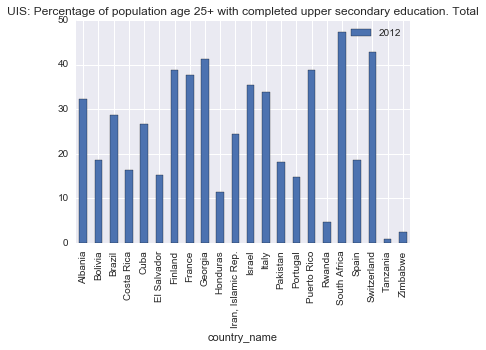

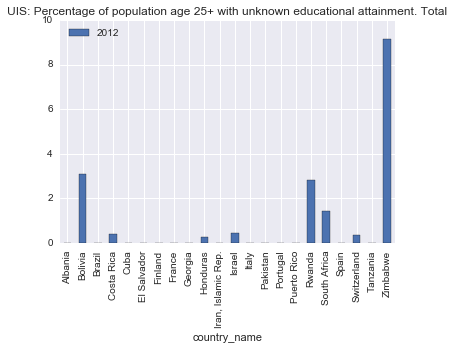

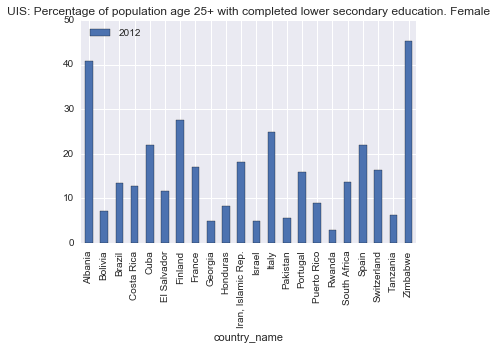

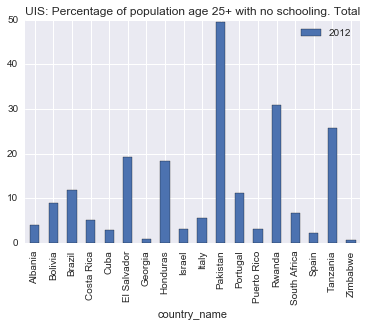

In [99]:
UIS=['UIS: Mean years of schooling of the population age 25+. Total','UIS: Percentage of population age 25+ with completed post-secondary education. Total','UIS: Percentage of population age 25+ with completed upper secondary education. Total','UIS: Percentage of population age 25+ with unknown educational attainment. Total', 'UIS: Percentage of population age 25+ with completed lower secondary education. Female','UIS: Percentage of population age 25+ with no schooling. Total']
for i in UIS:
    a = attain_sup_2005_2015[attain_sup_2005_2015['series_name']== i]
    d = a.loc[:,['country_name','series_name', '2012']].dropna(how='any').plot.bar(x='country_name', y='2012')
    plt.title(i)
    plt.show()

Так как для разных стран в нем предложена различная классификация уровней образования(некоторые из них поддерживают классификацию ISCED: International Standard Classification of Education),то мы учли эту классификацию

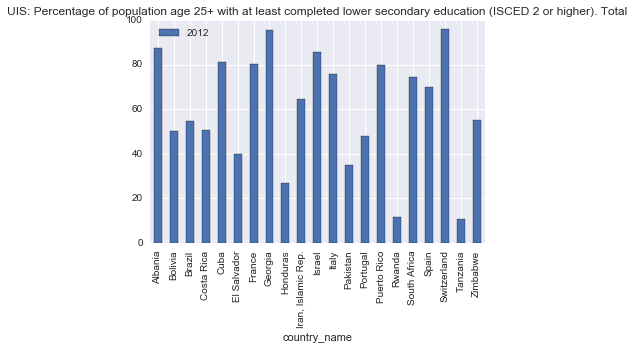

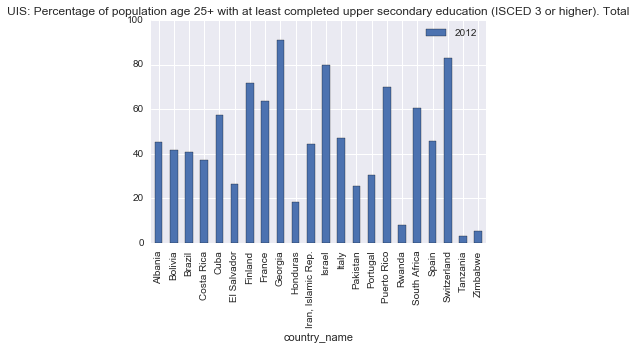

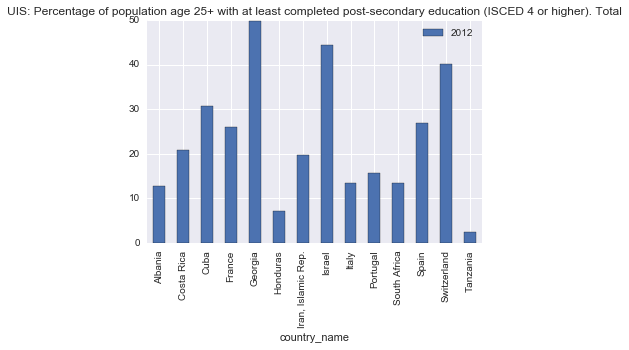

In [105]:
UIS_ISCED = ['UIS: Percentage of population age 25+ with at least completed lower secondary education (ISCED 2 or higher). Total','UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher). Total', 'UIS: Percentage of population age 25+ with at least completed post-secondary education (ISCED 4 or higher). Total' ]
for i in UIS_ISCED:
    a = attain_sup_2005_2015[attain_sup_2005_2015['series_name']== i]
    d = a.loc[:,['country_name','series_name', '2012']].dropna(how='any').plot.bar(x='country_name', y='2012')
    plt.title(i)
    plt.show()
       

Также мы выделили отдельно распространенность высшего образвания по странам в соответствии с классификацией ISCED

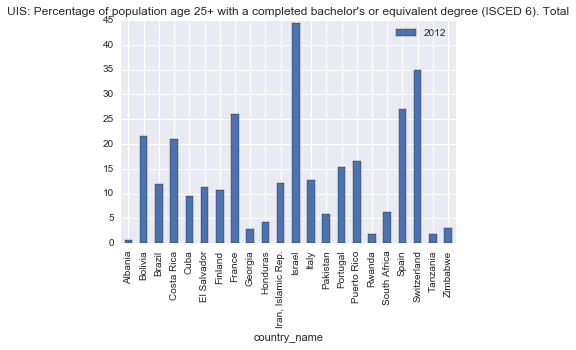

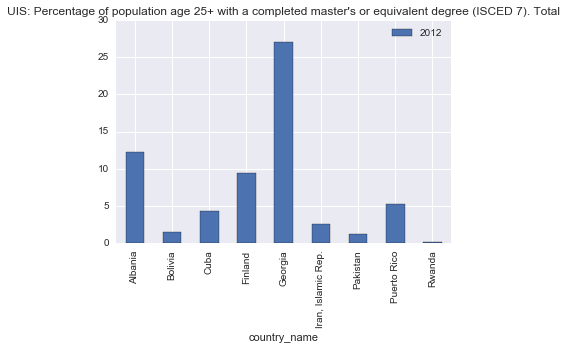

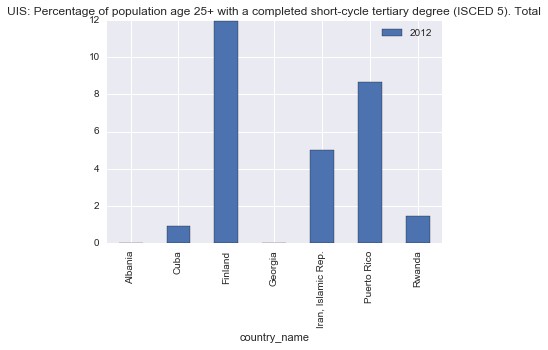

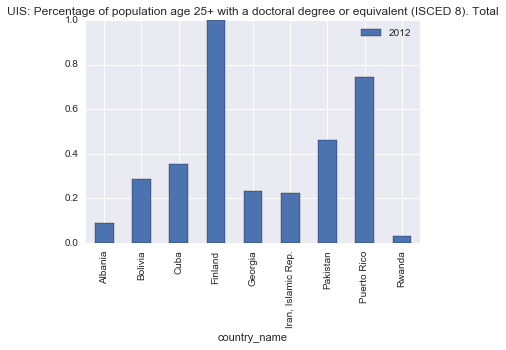

In [106]:
UIS_ISCED_high = ["UIS: Percentage of population age 25+ with a completed bachelor's or equivalent degree (ISCED 6). Total","UIS: Percentage of population age 25+ with a completed master's or equivalent degree (ISCED 7). Total",'UIS: Percentage of population age 25+ with a completed short-cycle tertiary degree (ISCED 5). Total','UIS: Percentage of population age 25+ with a doctoral degree or equivalent (ISCED 8). Total']
for i in UIS_ISCED_high:
    a = attain_sup_2005_2015[attain_sup_2005_2015['series_name']== i]
    d = a.loc[:,['country_name','series_name', '2012']].dropna(how='any').plot.bar(x='country_name', y='2012')
    plt.title(i)
    plt.show()

Обработка пропусков:

In [46]:
# определим количество пропущенных значений в данных
df_non_all = [df1, df2, df3, attain_sup, expend_sup, school_country]
names = ['Times Higher Education World University Ranking', 'Academic Ranking of World Universities', 'Center for World University Rankings','Educational attainment', 'Education expenditure','School_Country']
# суммы пропущенных данных в строках
for i in range(len(df_non_all)):
    print ('Missing values in', names[i])
    print(df_non_all[i].isnull().sum())
    print('\n')

Missing values in Times Higher Education World University Ranking
world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               19
student_staff_ratio        19
international_students     20
female_male_ratio         123
year                        0
dtype: int64


Missing values in Academic Ranking of World Universities
world_rank            0
university_name       1
national_rank         1
total_score        3796
alumni                1
award                 2
hici                  2
ns                   22
pub                   2
pcp                   2
year                  0
country               0
dtype: int64


Missing values in Center for World University Rankings
world_rank                0
institution               0
country                   0


Наблюдается значительное сокращение числа университетов, включенных в рейтинги. В особенности это относится к рейтингу Center for World University Rankings, так как переменная broad_impact доступна только для 2014 и 2015. 
Для рейтинга Academic Ranking of World Universities, сокращение количеста университетов в основном связаны с отсутствием total_score начиная со 101 места

Восстановим значения total score для рейтинга Academic Ranking of World Universities в период с 2012 по 2015
При первичном анализе было выявлено, что университеты, занявшие 100 место в рейтинге имеют не меньше 23,5 баллов total score.
Университету с наибольшим total score присваивается 100 баллов,для других университетов расчитываются как доля от баллов 1 места

__ приблизительные расчеты по методологии рейтинга __
* для рейтинга 101-150:  23,5 - 18,5; mean = 21
* для рейтинга 151-200:  18,5 - 14,9; mean = 16.7
* для рейтинга 201-300:  14,9 - 12,5; mean = 13.7
* для рейтинга 301-400:  12,5 - 9,6; mean = 11.05
* для рейтинга 401-500 и выше:  9,6 - меньше; mean = 4.8

заполним total score средними значениями для каждой группы 


In [48]:
# 2012
df2.loc[3614:3664,'total_score'] = 21
df2.loc[3714:3764,'total_score'] = 16.7
df2.loc[3764:3798,'total_score'] = 13.7
# в 2013 году в рейтинге отсутствуют пропущенные значения
# в 2014
df2.loc[3997:4047,'total_score'] = 21
df2.loc[4047:4097,'total_score'] = 16.7
df2.loc[4097:4197,'total_score'] = 13.7
df2.loc[4197:4297,'total_score'] = 11.05
df2.loc[4297:4397,'total_score'] = 4.8
# в 2015
df2.loc[4497:4547,'total_score'] = 21
df2.loc[4447:4597,'total_score'] = 16.7
df2.loc[4597:4697,'total_score'] = 13.7
df2.loc[4697:4797,'total_score'] = 11.05
df2.loc[4797:4897,'total_score'] = 4.8

Посмтрим на корреляцию составляющих рейтинга и total score, выделим наиболее коррелированные компонены:

Посчитаем коэффициены корреляции между переменными для 1 рейтинга и найдем 2 переменные с самым большим коэффициентом корреляции Пирсона. Эти две переменные будут обладать наибольшей зависимостью друг от друга:

In [45]:
corr = df1.corr(method = 'pearson', min_periods=1)
corr_array = np.array(corr)
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        if i==j and corr_array[i][j] == 1:
            corr_array[i][j] = 0
        corr_array[i][j] = abs(corr_array[i][j])
unique = np.unique(corr_array)
sort = unique[::-1]
ans = sort[:1]
a = corr.columns
b = corr.index
for i in range(len(corr.columns)):
    for j in range(i+1):
        for _ in range(1):
            if abs(corr_array[i][j]) == ans[_]:
                print('Пара с наибольшей корреляцией:', a[i], b[j])

Пара с наибольшей корреляцией: research teaching


Проделаем то же самое для двух оставшихся рейтингов:

In [46]:
corr = df2.corr(method = 'pearson', min_periods=1)
corr_array = np.array(corr)
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        if i==j and corr_array[i][j] == 1:
            corr_array[i][j] = 0
        corr_array[i][j] = abs(corr_array[i][j])
unique = np.unique(corr_array)
sort = unique[::-1]
ans = sort[:1]
a = corr.columns
b = corr.index
for i in range(len(corr.columns)):
    for j in range(i+1):
        for _ in range(1):
            if abs(corr_array[i][j]) == ans[_]:
                print('Пара с наибольшей корреляцией:', a[i], b[j])

Пара с наибольшей корреляцией: ns total_score


In [47]:
corr = df3.corr(method = 'pearson', min_periods=1)
corr_array = np.array(corr)
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        if i==j and corr_array[i][j] == 1:
            corr_array[i][j] = 0
        corr_array[i][j] = abs(corr_array[i][j])
unique = np.unique(corr_array)
sort = unique[::-1]
ans = sort[:1]
a = corr.columns
b = corr.index
for i in range(len(corr.columns)):
    for j in range(i+1):
        for _ in range(1):
            if abs(corr_array[i][j]) == ans[_]:
                print('Пара с наибольшей корреляцией:', a[i], b[j])

Пара с наибольшей корреляцией: broad_impact world_rank


Проанализируем положение российских университетов в мировых рейтингах:

In [53]:
# найдем в рейтингах университеты России:
for i in range(len(df)):
    a = df[i][df[i]['country'] == 'Russia']
    b = df[i][df[i]['country'] == 'Russian Federation']
    if a.empty != True or b.empty != True:
        print(names_rank[i]+ ' ' +'есть российские университеты')
    else:
        print(names_rank[i]+ ' ' +'нет российских университетов')

Times Higher Education World University Ranking есть российские университеты
Academic Ranking of World Universities есть российские университеты
Center for World University Rankings есть российские университеты


In [54]:
russia = df1[df1['country'] == 'Russian Federation']    
russia.set_index(['year','country' ])

,,world_rank,university_name,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio
year,country,,,,,,,,,,,,
2015,Russian Federation,196,Lomonosov Moscow State University,55.9,60.4,42.1,33.8,78.5,46.0,"30,822",7.7,20%,43 : 57
2016,Russian Federation,=161,Lomonosov Moscow State University,75.4,57.8,66.7,8.6,95.7,51.9,"30,822",7.7,20%,43 : 57


In [55]:
russia = df2[df2['country'] == 'Russian Federation']    
russia.set_index(['year','country' ])

,,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp
year,country,,,,,,,,,,
2005,Russian Federation,301-400,Saint Petersburg State University,2,NaN,24.3,0.0,0.0,6.0,31.9,15.6
2006,Russian Federation,301-400,Saint Petersburg State University,2,NaN,23.4,0.0,0.0,6.0,31.1,16.3
2007,Russian Federation,305-402,Saint Petersburg State University,2,NaN,28.8,0.0,0.0,6.2,28.9,16.2
2008,Russian Federation,303-401,Saint Petersburg State University,2,NaN,27.4,0.0,0.0,5.3,31.6,17.3
2009,Russian Federation,303-401,Saint Petersburg State University,2,NaN,26.8,0.0,0.0,6.3,28.9,16.1
2010,Russian Federation,301-400,Saint Petersburg State University,2,NaN,26.1,0.0,0.0,4.8,29.6,15.4
2011,Russian Federation,301-400,Saint Petersburg State University,2,NaN,30.6,0.0,0.0,4.8,26.8,16.0
2014,Russian Federation,301-400,Saint Petersburg State University,2,11.05,27.3,0.0,0.0,6.1,28.0,16.0
2015,Russian Federation,301-400,Saint Petersburg State University,2,11.05,26.7,0.0,0.0,6.7,29.7,17.4


In [56]:
russia = df3[df3['country'] == 'Russia']    
russia.set_index(['year','country' ])

world_rank                                 institution  \
year country                                                           
2013 Russia           90           Lomonosov Moscow State University   
2014 Russia           48           Lomonosov Moscow State University   
     Russia          285           Saint Petersburg State University   
     Russia          916                Novosibirsk State University   
2015 Russia           59           Lomonosov Moscow State University   
     Russia          250  Moscow Institute of Physics and Technology   
     Russia          406           Saint Petersburg State University   
     Russia          755  National Research Nuclear University MEPhI   
     Russia          985                Novosibirsk State University   

              national_rank  quality_of_education  alumni_employment  \
year country                                                           
2013 Russia               1                    14                101   
2014 Russia               1                    14                210   
     Russia               2                    37                129   
     Russia               3                   147                478   
2015 Russia               1                    14                175   
     Russia               2                    23                339   
     Russia               3                    47                250   
     Russia               4                   306                567   
     Russia               5                   167                567   

              quality_of_faculty  publications  influence  citations  \
year country                                                           
2013 Russia                   51           101        101        101   
2014 Russia                   50           264        247        310   
     Russia                  210           619        620        609   
     Russia                  210           875        910        609   
2015 Russia                   48           268        254        287   
     Russia                  218           949        605        812   
     Russia                  218           621        574        645   
     Russia                  218           957        699        428   
     Russia                  218           819        858        645   

              broad_impact  patents  score  
year country                                
2013 Russia            NaN      101  44.93  
2014 Russia          361.0      737  56.42  
     Russia          756.0      737  46.49  
     Russia          994.0      737  44.38  
2015 Russia          344.0      861  54.19  
     Russia         1000.0      839  46.55  
     Russia          754.0      816  45.14  
     Russia          671.0      871  44.29  
     Russia          991.0      871  44.04